In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# discovered the dataset on kaggle: https://www.kaggle.com/datasets/mirichoi0218/insurance
costs = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

costs

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
costs = pd.get_dummies(costs, dtype=int)

costs.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [4]:
X = costs.drop("charges", axis=1)
y = costs[["charges"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# OBSERVATIONS:
# NORMAL SGD 1layer-1unit -> ~7000 mae train loss
# ADDING 10unit hidden layer doesn't help (~7500)
# making it 100unit -> ~7200
# adding 10unit in b/w -> NAN! (the model is too big according to the dataset)
# changed the optimizer to Adam -> 5100!!
# LR = 0.01 -> ~3500

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)

history = model.fit(X_train, y_train, epochs=200)

model.evaluate(X_test, y_test)

Epoch 1/200
34/34 [==============================] - 0s 634us/step - loss: 11237.1748 - mae: 11237.1748
Epoch 2/200
34/34 [==============================] - 0s 602us/step - loss: 7423.2158 - mae: 7423.2158
Epoch 3/200
34/34 [==============================] - 0s 596us/step - loss: 7215.5039 - mae: 7215.5039
Epoch 4/200
34/34 [==============================] - 0s 602us/step - loss: 7000.7646 - mae: 7000.7646
Epoch 5/200
34/34 [==============================] - 0s 585us/step - loss: 6699.2329 - mae: 6699.2329
Epoch 6/200
34/34 [==============================] - 0s 585us/step - loss: 6474.7456 - mae: 6474.7456
Epoch 7/200
34/34 [==============================] - 0s 597us/step - loss: 6355.0190 - mae: 6355.0190
Epoch 8/200
34/34 [==============================] - 0s 591us/step - loss: 6197.1958 - mae: 6197.1958
Epoch 9/200
34/34 [==============================] - 0s 590us/step - loss: 6052.4712 - mae: 6052.4712
Epoch 10/200
34/34 [==============================] - 0s 570us/step - loss: 5883

[3180.5439453125, 3180.5439453125]

Text(0.5, 0, 'epoch')

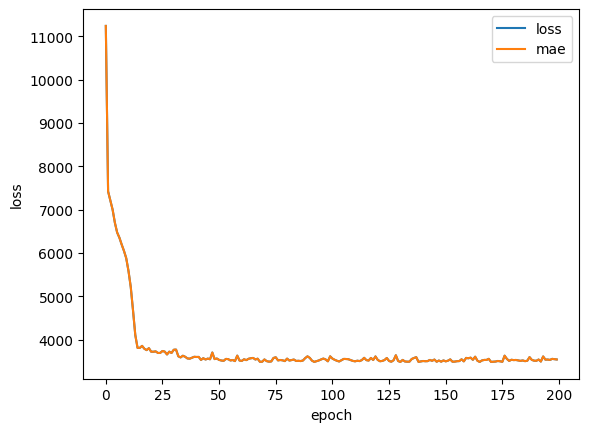

In [30]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epoch")